In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
pd.set_option('display.max_columns', None) 

In [2]:
df= pd.read_csv('en.openfoodfacts.org.products_clean.csv', sep="\t", low_memory=False)

In [3]:
df

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,Purée Mix Tropical Harmony + Aloe,smartfruit,smartfruit,Tea bags,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverage ...","No gluten, Vegetarian, No artificial flavors, ...","en:no-gluten,en:vegetarian,en:no-artificial-fl...","No gluten,Vegetarian,No artificial flavors,Veg...",NaN,"Vereinigte Staaten von Amerika, Germany","en:germany,en:united-states","Germany,United States","en:may-contain-palm-oil,en:vegan,en:vegetarian",4.0,"en:e160a,en:e160ai,en:e330,en:e415,en:e440","E160a - Carotene,E160ai - Beta-carotene,E330 -...",NaN,unknown,4.0,80.0,a,"en:fat-in-low-quantity,en:saturated-fat-in-low...",233.0,977.0,0.000000,0.000000,53.300000,50.000000,0.000000,3.33,0.000000,0.000000,32.987467,NaN
1,Poudre de grillon,naak,naak,Bebidas instantáneas,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverage ...","Organic, EU Organic, FR-BIO-01, en:nutriscore","en:organic,en:eu-organic,en:fr-bio-01,en:nutri...","Organic,EU Organic,FR-BIO-01,Nutriscore",Amazon.ca,Canada,en:canada,Canada,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,"en:fat-in-moderate-quantity,en:saturated-fat-i...",400.0,1674.0,16.444445,4.666666,44.666668,4.888889,17.111111,10.00,0.013123,0.005249,NaN,NaN
2,Feuchtes Toilettentuch - Kamille,3 alfa,3-alfa,NaN,NaN,NaN,en:no-alcohol,en:no-alcohol,No alcohol,NaN,GR,en:greece,Greece,"en:palm-oil-content-unknown,en:vegan-status-un...",0.0,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,160.0,669.0,3.200000,0.500000,19.800000,1.400000,8.500000,8.70,0.807087,0.322835,0.000000,NaN
3,Almond Dark Chocolate,Alter Aco,alter-aco,Dark chocolate bar,"en:snacks,en:sweet-snacks,en:cocoa-and-its-pro...","Snacks,Sweet snacks,Cocoa and its products,Cho...","FSC Mix,CH-BIO-006,Certified B Corporation,Soi...","en:fair-trade,en:organic,en:eu-organic,en:cert...","Fair trade,Organic,EU Organic,Certified B Corp...",Amazon,CZ,en:czech-republic,Czech Republic,"en:palm-oil-free,en:vegan,en:vegetarian",0.0,NaN,NaN,19.0,e,3.0,41.0,d,"en:fat-in-high-quantity,en:saturated-fat-in-hi...",578.0,2401.0,40.900000,21.500000,40.700000,35.000000,8.400000,7.50,0.000000,0.000000,12.000000,19.0
4,Bio inulin,EWL,ewl,Gemüse,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:no-lactose,en:no-lactose,No lactose,NaN,France,en:france,France,"en:palm-oil-free,en:vegan,en:vegetarian",0.0,NaN,NaN,-2.0,a,3.0,NaN,unknown,"en:fat-in-low-quantity,en:saturated-fat-in-low...",208.0,840.0,0.000000,0.000000,8.000000,8.000000,88.000000,0.00,0.230000,0.092000,50.000000,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959245,TK Weizen-Brötchen,Conditorei Coppenrath & Wiese,conditorei-coppenrath-wiese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:germany,en:germany,Germany,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,271.0,1134.0,1.900000,0.400000,53.000000,2.200000,NaN,9.00,1.500000,0.600000,NaN,NaN
1959246,Baguette-brötchen 2te Wahl,Coppenrath & Wiese,coppenrath-wiese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:germany,en:germany,Germany,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959247,Erdbeerkuchen 1019g tiefgefroren,Coppenrath & Wiese,coppenrath-wiese,"Imbiss, Süßer Snack, Kekse und Kuchen, Kuchen,...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Cakes,d...",Her

In [4]:
df['stores'].value_counts()


stores
Carrefour                                22833
Auchan                                   21221
Lidl                                     17225
Magasins U                               12001
Migros                                   11215
                                         ...  
Coopérative l'Oulibo                         1
super u pignan                               1
Oliviers & co                                1
oliviers & co                                1
super u saint romain de colbosc 76430        1
Name: count, Length: 23702, dtype: int64

In [5]:
df['countries'].value_counts()


countries
France                                                343761
United States                                         186479
en:fr                                                  90753
en:it                                                  86218
España                                                 83931
                                                       ...  
Guatemala, México, El Salvador, Costa Rica, Panamá         1
Nederland,nl:roemenie,en:netherlands                       1
Belgia,Francja,Niemcy,Szwajcaria                           1
panama                                                     1
Bulgaria,Cyprus,Czech Republic,Greece                      1
Name: count, Length: 16670, dtype: int64

In [6]:
df_poland_tag = df[df['countries_tags'].str.contains('en:poland', case=False, na=False)]

In [7]:
df_poland_tag

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
11,HIGH PROTEIN ICED COFFEE Herbalife,Herbalife,herbalife,"Groceries,Dietary supplements,Bodybuilding sup...","en:groceries,en:dietary-supplements,en:bodybui...","Groceries,Dietary supplements,Bodybuilding sup...",NaN,NaN,NaN,https://supplements-online.ecwid.com/Instructi...,"France,Italy,Spain,United Kingdom,United State...","en:france,en:italy,en:spain,en:united-kingdom,...","France,Italy,Spain,United Kingdom,United State...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539,Red Bull 355 ml,Red Bull,red-bull,en:energy-drinks,"en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages...",NaN,NaN,NaN,NaN,en:poland,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,not-applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917,7days double super max wanilia i wiśnia,7 days,7-days,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2324,Sałatka kurczak w panko,Love eat,love-eat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PL,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,160.0,669.0,9.0,0.7,13.3,3.0,0.8,6.1,0.1000,0.040,NaN,NaN
3042,Musztarda sarepska,Kamis,kamis,"Condiments, Sauces, Mustards, pl:Musztarda sar...","en:condiments,en:sauces,en:mustards,pl:musztar...","Condiments,Sauces,Mustards,pl:musztarda-sarepska",NaN,NaN,NaN,NaN,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,12.0,d,NaN,55.0,c,"en:fat-in-moderate-quantity,en:saturated-fat-i...",93.0,388.0,4.0,0.2,7.9,7.7,NaN,4.4,2.9000,1.160,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958703,Mozzarella Grattugiata,Galbani,galbani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:Poland,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,286.0,1197.0,20.0,14.0,2.5,0.5,NaN,24.0,1.3775,0.551,NaN,NaN
1958704,Sos hamburger pomidorowo-jogurtowy,Madero,madero,"Przyprawy, Sosy, en:hamburger sauces","en:condiments,en:sauces,en:hamburger-sauces","Condiments,Sauces,Hamburger-sauces",NaN,NaN,NaN,NaN,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958716,Słonecznik solony,Sonpex,sonpex,"Żywność i napoje na bazie roślin, Żywność na b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,43.0,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958722,Dr pepper,Dr Pepper,dr-pepper,"Napoje, Napoje gazowane, en:Sodas","en:beverages,en:carbonated-drinks,en:sodas","Beverages,Carbonated drinks,Sodas",NaN,NaN,NaN,NaN,en:poland,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,not-applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [236]:
PL_brands_count= df_poland_tag['brands'].value_counts()

In [238]:
PL_brands = PL_brands_count[PL_brands_count >= 50].index

In [240]:
PL_brands_filtered = df[df['brands'].isin(PL_brands)]

In [246]:
PL_brands_filtered['brands']

569             Lidl
732        Carrefour
736        Carrefour
741        Carrefour
757           Auchan
             ...    
1959031       Auchan
1959032       Auchan
1959033       Auchan
1959034       Auchan
1959035         Lidl
Name: brands, Length: 51732, dtype: object

In [248]:
PL_brands_filtered['brands'].unique().tolist()


['Lidl',
 'Carrefour',
 'Auchan',
 'Danone',
 'Biedronka',
 "Lay's",
 'Dawtona',
 'Pilos',
 'Tarczyński',
 'Bakoma',
 'Vitanella',
 'Roleski',
 'Tymbark',
 'Piątnica',
 'Mlekovita',
 'Łowicz',
 'Lisner',
 'Kraina Wędlin',
 'Sokołów',
 'Delikate',
 'Hortex']

In [8]:
polish_stores_counts = df_poland_tag['stores'].value_counts()

In [9]:
polish_stores = polish_stores_counts[polish_stores_counts >= 50].index

In [10]:
polish_stores_filtered = df[df['stores'].isin(polish_stores)]

In [11]:
polish_stores_filtered['stores']

26             Tesco
55             Tesco
679           Auchan
686           Auchan
701        Carrefour
             ...    
1959032       Auchan
1959033       Auchan
1959034       Auchan
1959045         Lidl
1959237        Tesco
Name: stores, Length: 81213, dtype: object

In [12]:
polish_stores_filtered['stores'].unique().tolist()


['Tesco',
 'Auchan',
 'Carrefour',
 'Lidl',
 'Kaufland',
 'Netto',
 'Dino',
 'Carrefour, carrefour.fr',
 'Biedronka',
 'Żabka',
 'Carrefour,carrefour.fr']

In [13]:
polish_stores_filtered 

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
26,10 chicken stock cubes,Tesco,tesco,Bouillon cubes,"en:dried-products,en:dried-products-to-be-rehy...","Dried products,Dried products to be rehydrated...",NaN,NaN,NaN,Tesco,"Frankreich, Germany","en:france,en:germany","France,Germany","en:palm-oil,en:non-vegan,en:non-vegetarian",0.0,NaN,NaN,NaN,unknown,4.0,NaN,unknown,NaN,6.000000,26.0,0.300000,0.200000,0.500000,0.200000,0.100000,0.300000,0.80,0.320,0.200000,NaN
55,Gammon steaks,Tesco,tesco,NaN,NaN,NaN,NaN,NaN,NaN,Tesco,en:United Kingdom,en:united-kingdom,United Kingdom,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,Mouliné de Légumes Bio,Liebig,liebig,NaN,NaN,NaN,"Bio, Bio européen, Sans conservateurs, Agricul...","en:organic,en:eu-organic,en:no-preservatives,e...","Organic,EU Organic,No preservatives,EU Agricul...",Auchan,France,en:france,France,"en:palm-oil-content-unknown,en:non-vegan,en:ve...",0.0,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,124.0,0.700000,0.400000,4.400000,0.700000,1.000000,0.800000,0.68,0.272,50.000000,NaN
686,Délice de potiron châtaigne,liebig,liebig,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Sans conservateurs, Sans colorants","en:no-preservatives,en:no-colorings","No preservatives,No colorings",Auchan,France,en:france,France,"en:palm-oil-free,en:non-vegan,en:maybe-vegetarian",1.0,en:e14xx,E14XX - Modified Starch,1.0,b,4.0,83.0,a,"en:fat-in-low-quantity,en:saturated-fat-in-low...",NaN,143.0,0.800000,0.400000,5.500000,2.300000,1.100000,0.700000,0.76,0.304,45.800000,1.0
701,velouté de potiron et graines de courge bio,Liebig,liebig,"Plats préparés, Soupes","en:meals,en:soups","Meals,Soups","Bio, Bio européen, Sans conservateurs, AB Agri...","en:organic,en:eu-organic,en:no-preservatives,f...","Organic,EU Organic,No preservatives,AB Agricul...",Carrefour,en:France,en:france,France,"en:palm-oil-free,en:non-vegan,en:vegetarian-st...",0.0,NaN,NaN,1.0,b,4.0,NaN,unknown,"en:fat-in-low-quantity,en:saturated-fat-in-low...",33.000000,138.0,0.900000,0.500000,4.700000,1.300000,1.100000,0.800000,0.63,0.252,32.395833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959032,Petit pois carotte,Auchan,auchan,NaN,NaN,NaN,NaN,NaN,NaN,Auchan,en:Ireland,en:ireland,Ireland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,58.461538,245.0,0.615385,0.230769,7.615384,3.692308,4.615385,3.384615,NaN,NaN,NaN,NaN
1959033,Framboises blueberries surgelés,Auchan,auchan,NaN,NaN,NaN,NaN,NaN,NaN,Auchan,en:Ireland,en:ireland,Ireland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,45.000000,188.0,0.500000,0.100000,7.600000,7.100000,4.600000,1.100000,NaN,NaN,NaN,NaN
1959034,Comté râpé,Auchan,auchan,NaN,NaN,NaN,NaN,NaN,NaN,Auchan,en:Ireland,en:ireland,Ireland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,427.000000,1787.0,35.000000,23.000000,1.000000,1.000000,NaN,27.000000,NaN,NaN,NaN,NaN
1959045,Vegetarische Schnitzel (traduction française),Vemondo,vemondo,NaN,NaN,NaN,"Végétarien, Union Végétarienne Européenne, Uni...","en:vegetarian,en:european-vegetarian-union,en:...","Vegetarian,European Vegetarian Union,European ...",Lidl,France,en:france,France,en:vegetarian,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,238.000000,996.0,12.200000,1.300000,14.900000,1.200000,NaN,15.200000,1.90,0.760,NaN,NaN


In [14]:
PL_data = polish_stores_filtered[polish_stores_filtered['countries_tags'].str.contains('en:poland', case=False, na=False)]

In [15]:
PL_data #dataframe with only PL country stores 

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
62034,Malina odmiana Adelina,Dino,dino,"Żywność i napoje na bazie roślin, Żywność na b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,Dino,en:Poland,en:poland,Poland,"en:palm-oil-content-unknown,en:vegan-status-un...",0.0,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
127710,Chrzan tarty,Madero,madero,"Żywność i napoje na bazie roślin, Żywność na b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",2.0,"en:e223,en:e330","E223 - Sodium metabisulphite,E330 - Citric acid",-2.0,a,3.0,NaN,unknown,"en:fat-in-moderate-quantity,en:saturated-fat-i...",113.0,474.0,5.2,0.4,13.0,9.5,3.5,1.7,0.35,0.140,68.888889,-2.0
139765,"Grillowa - pieczony kurczak, pieczona cebula, ...",Tomcio paluch,tomcio-paluch,"Kanapki,en:Chicken sandwiches","en:sandwiches,en:poultry-sandwiches,en:chicken...","Sandwiches,Poultry sandwiches,Chicken sandwiches",NaN,NaN,NaN,Żabka,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,37.0,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146824,Spaghetti bolognese,Szamam,szamam,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",Nutriscore,en:nutriscore,Nutriscore,Żabka,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,-1.0,a,NaN,NaN,unknown,"en:fat-in-low-quantity,en:saturated-fat-in-low...",116.0,486.0,2.6,1.0,17.0,2.8,1.3,5.8,0.60,0.240,NaN,-1.0
152287,Pizza wrap Gyros,Żabka,żabka,"Kanapki,en:Chicken wraps","en:sandwiches,en:wraps,en:chicken-wraps","Sandwiches,Wraps,Chicken wraps",Nutriscore,en:nutriscore,Nutriscore,Żabka,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,NaN,unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915960,Napój sojowy waniliowy,"Go Vege,Biedronka","go-vege,biedronka","Plant-based foods and beverages, Beverages, Pl...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...","Vegetarian, Vegan, No lactose","en:vegetarian,en:vegan,en:no-lactose","Vegetarian,Vegan,No lactose",Biedronka,"Austria,Polska","en:austria,en:poland","Austria,Poland","en:palm-oil-free,en:vegan,en:vegetarian",0.0,NaN,NaN,-2.0,a,4.0,80.0,a,"en:fat-in-moderate-quantity,en:saturated-fat-i...",52.0,219.0,1.8,0.3,5.3,4.5,0.8,3.3,0.14,0.056,0.000000,-2.0
1915963,Napój sojowy klasyczny,"Vitanella,Mona Naturprodukte","vitanella,mona-naturprodukte","Żywność i napoje na bazie roślin, Napoje, Żywn...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...","Wegetariańskie, Wegańskie, V-Label, V-Label Ve...","en:vegetarian,en:vegan,en:european-vegetarian-...","Vegetarian,Vegan,European Vegetarian Union,Eur...",Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",3.0,"en:e101,en:e340,en:e418","E101 - Riboflavin,E340 - Potassium phosphates,...",-1.0,a,4.0,99.0,a-plus,"en:fat-in-moderate-quantity,en:saturated-fat-i...",46.0,191.0,1.8,0.3,3.9,3.7,NaN,3.2,0.10,0.040,0.000000,-1.0
1915965,Napój sojowy o smaku czekoladowym,vitanella,vitanella,"Żywność i napoje na bazie roślin, Napoje, Żywn...","en:plant-based-foods-and-beverages,en:bev

In [16]:
PL_data['nutriscore_grade'] # check nutri score of products

62034      unknown
127710           a
139765     unknown
146824           a
152287     unknown
            ...   
1915960          a
1915963          a
1915965          b
1917343    unknown
1948919    unknown
Name: nutriscore_grade, Length: 2957, dtype: object

In [17]:
PL_data_nutri_score = PL_data[PL_data['nutriscore_grade'].str.lower() != 'unknown']

In [18]:
PL_data_nutri_score['nutriscore_grade']

127710     a
146824     a
237726     e
251419     e
297739     b
          ..
1915955    b
1915959    b
1915960    a
1915963    a
1915965    b
Name: nutriscore_grade, Length: 2547, dtype: object

In [19]:
na_count = PL_data_nutri_score['nutriscore_grade'].isna().sum()
print(na_count)

0


In [20]:
PL_data_nutri_score

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
127710,Chrzan tarty,Madero,madero,"Żywność i napoje na bazie roślin, Żywność na b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",2.0,"en:e223,en:e330","E223 - Sodium metabisulphite,E330 - Citric acid",-2.0,a,3.0,NaN,unknown,"en:fat-in-moderate-quantity,en:saturated-fat-i...",113.0,474.0,5.2,0.4,13.0,9.5,3.5,1.7,0.35,0.140,68.888889,-2.0
146824,Spaghetti bolognese,Szamam,szamam,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",Nutriscore,en:nutriscore,Nutriscore,Żabka,Polska,en:poland,Poland,NaN,NaN,NaN,NaN,-1.0,a,NaN,NaN,unknown,"en:fat-in-low-quantity,en:saturated-fat-in-low...",116.0,486.0,2.6,1.0,17.0,2.8,1.3,5.8,0.60,0.240,NaN,-1.0
237726,Gryzzale kabanoski z kurczaka z indykiem,Tarczyński,tarczyński,"Produkty na bazie mięsa, Mięsa, Mięsa przetwor...","en:meats-and-their-products,en:meat-preparatio...","Meats and their products,Meat preparations,Mea...",NaN,NaN,NaN,Kaufland,Polska,en:poland,Poland,"en:palm-oil-free,en:non-vegan,en:non-vegetarian",1.0,en:e401,E401 - Sodium alginate,19.0,e,4.0,14.0,f,"en:fat-in-high-quantity,en:saturated-fat-in-hi...",317.0,1318.0,21.0,6.4,5.8,1.7,NaN,24.0,2.30,0.920,6.337500,19.0
251419,Jaffa cake minis Orange,K-Classic,k-classic,"Przekąski, Słodkie przekąski, en:Biscuits and ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",NaN,NaN,NaN,Kaufland,Polska,en:poland,Poland,"en:palm-oil,en:non-vegan,en:maybe-vegetarian",7.0,"en:e322,en:e330,en:e420,en:e440,en:e450,en:e47...","E322 - Lecithins,E330 - Citric acid,E420 - Sor...",19.0,e,4.0,45.0,c,"en:fat-in-moderate-quantity,en:saturated-fat-i...",387.0,1629.0,12.0,6.8,65.0,48.0,2.4,3.6,0.24,0.096,4.400000,19.0
297739,Sok grejpfrutowy,"Victoria,Cymes","victoria,cymes","Żywność i napoje na bazie roślin, Napoje, Napo...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...",Zawiera witaminę C,pl:zawiera-witaminę-c,pl:zawiera-witaminę-c,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",0.0,NaN,NaN,1.0,b,1.0,21.0,e,"en:fat-in-low-quantity,en:saturated-fat-in-low...",40.0,168.0,0.0,0.0,9.5,6.7,NaN,0.5,0.00,0.000,100.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915955,Napój sojowy UHT o smaku waniliowym wzbogacony...,"Vitanella,Mona Naturprodukte","vitanella,mona-naturprodukte","Żywność i napoje na bazie roślin, Napoje, Żywn...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...","Wegetariańskie, Wegańskie, V-Label, V-Label Ve...","en:vegetarian,en:vegan,en:european-vegetarian-...","Vegetarian,Vegan,European Vegetarian Union,Eur...",Biedronka,Polska,en:poland,Poland,"en:may-contain-palm-oil,en:vegan,en:vegetarian",4.0,"en:e101,en:e160a,en:e407,en:e418","E101 - Riboflavin,E160a - Carotene,E407 - Carr...",0.0,b,4.0,74.0,b,"en:fat-in-moderate-quantity,en:saturated-fat-i...",59.0,249.0,1.8,0.3,7.5,7.4,NaN,3.0,0.11,0.044,0.000000,0.0
1915959,Bio Owies,Go Vege,go-vege,"en:Beverages and beverages preparations,Żywnoś...","en:beverages-and-beverages-preparations,en:pla...","Beverages and beverages preparations,Plant-bas...","Ekologiczny,Wegetariańsk

In [21]:
#Nutriscore by brands

In [22]:
PL_data_nutri_score['nutriscore_grade'].unique()

array(['a', 'e', 'b', 'd', 'c', 'not-applicable'], dtype=object)

In [23]:
count_a = PL_data_nutri_score['nutriscore_grade'].value_counts().get('a', 0)
count_a

479

In [24]:
count_b = PL_data_nutri_score['nutriscore_grade'].value_counts().get('b', 0)
count_b

406

In [25]:
count_c = PL_data_nutri_score['nutriscore_grade'].value_counts().get('c', 0)
count_c

522

In [26]:
count_d = PL_data_nutri_score['nutriscore_grade'].value_counts().get('d', 0)
count_d

649

In [27]:
count_e = PL_data_nutri_score['nutriscore_grade'].value_counts().get('e', 0)
count_e

424

In [28]:
nutri_scores = ['A', 'B', 'C', 'D', 'E']
counts = [count_a, count_b, count_c, count_d, count_e]
colors = ['#008000', '#66c266', '#ffcc00', '#ff8000', '#ff0000']

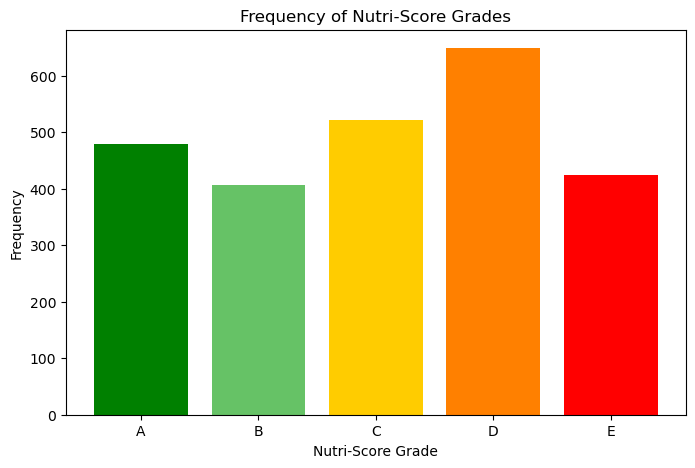

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(nutri_scores, counts, color=colors)
plt.xlabel('Nutri-Score Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Nutri-Score Grades')
plt.show()

In [30]:
#Nutri-Score Grade by A (top 10)
brands_with_grade_a_counts =PL_data_nutri_score[PL_data_nutri_score['nutriscore_grade'] == 'a']['brands'].value_counts()
brands_with_grade_a_counts = brands_with_grade_a_counts.reset_index()
brands_with_grade_a_counts.columns = ['Brand', 'Frequency']

In [31]:
#mapping
brands_with_grade_a_counts['Frequency'] = brands_with_grade_a_counts['Brand'].map(brands_with_grade_a_counts.set_index('Brand')['Frequency'])

In [284]:
#table
brands_with_grade_a_counts = brands_with_grade_a_counts.reset_index(drop=True)
brands_with_grade_a_counts.index = brands_with_grade_a_counts.index + 1
brands_with_grade_a_counts=brands_with_grade_a_counts.head(10)
brands_with_grade_a_counts

,Brand,Frequency
1,Carrefour,55
2,Auchan,24
3,Plony Natury,17
4,Go Active,9
5,Vital Fresh,7
6,Mroźna Kraina,7
7,Go Vege,7
8,Dawtona,6
9,Tesco,6
10,Lidl,6


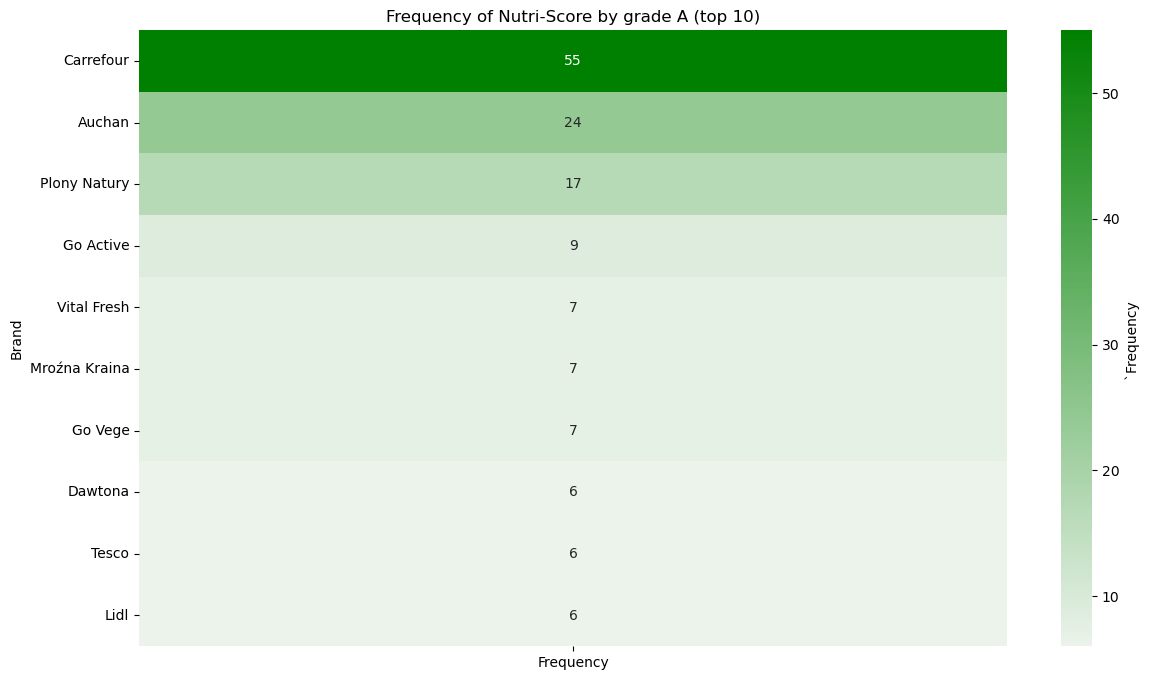

In [334]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_a_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap = sns.light_palette("green", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of Nutri-Score by grade A (top 10)')
plt.show()

In [33]:
#Nutri-Score Grade by b (top 10)
brands_with_grade_b_counts =PL_data_nutri_score[PL_data_nutri_score['nutriscore_grade'] == 'b']['brands'].value_counts()
brands_with_grade_b_counts = brands_with_grade_b_counts.reset_index()
brands_with_grade_b_counts.columns = ['Brand', 'Frequency']

In [34]:
#mapping
brands_with_grade_b_counts['Frequency'] = brands_with_grade_b_counts['Brand'].map(brands_with_grade_b_counts.set_index('Brand')['Frequency'])

In [288]:
#table
brands_with_grade_b_counts = brands_with_grade_b_counts.reset_index(drop=True)
brands_with_grade_b_counts.index = brands_with_grade_b_counts.index + 1
brands_with_grade_b_counts=brands_with_grade_b_counts.head(10)
brands_with_grade_b_counts

,Brand,Frequency
1,Carrefour,42
2,Auchan,24
3,K-take it veggie,11
4,Tesco,8
5,Bakoma,7
6,Vemondo,7
7,Go Vege,6
8,Danone,6
9,Piątnica,6
10,Biedronka,6


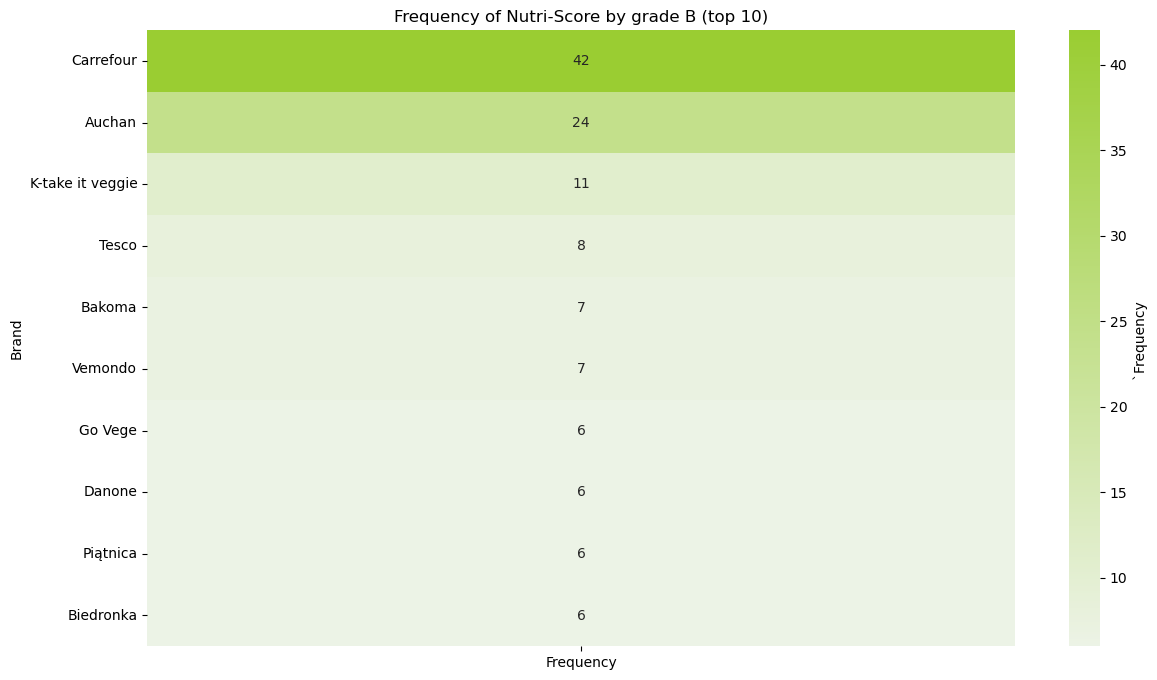

In [322]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_b_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("yellowgreen", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of Nutri-Score by grade B (top 10)')
plt.show()

In [36]:
#Nutri-Score Grade by c (top 10)
brands_with_grade_c_counts =PL_data_nutri_score[PL_data_nutri_score['nutriscore_grade'] == 'c']['brands'].value_counts()
brands_with_grade_c_counts = brands_with_grade_c_counts.reset_index()
brands_with_grade_c_counts.columns = ['Brand', 'Frequency']

In [37]:
#mapping
brands_with_grade_c_counts['Frequency'] = brands_with_grade_c_counts['Brand'].map(brands_with_grade_c_counts.set_index('Brand')['Frequency'])

In [292]:
#table
brands_with_grade_c_counts = brands_with_grade_c_counts.reset_index(drop=True)
brands_with_grade_c_counts.index = brands_with_grade_c_counts.index + 1
brands_with_grade_c_counts=brands_with_grade_c_counts.head(10)
brands_with_grade_c_counts

,Brand,Frequency
1,Carrefour,26
2,Auchan,19
3,Dawtona,9
4,Graal,8
5,Go Vege,8
6,Solevita,6
7,Vital FRESH,6
8,Vitanella,5
9,Kaufland,4
10,Top,4


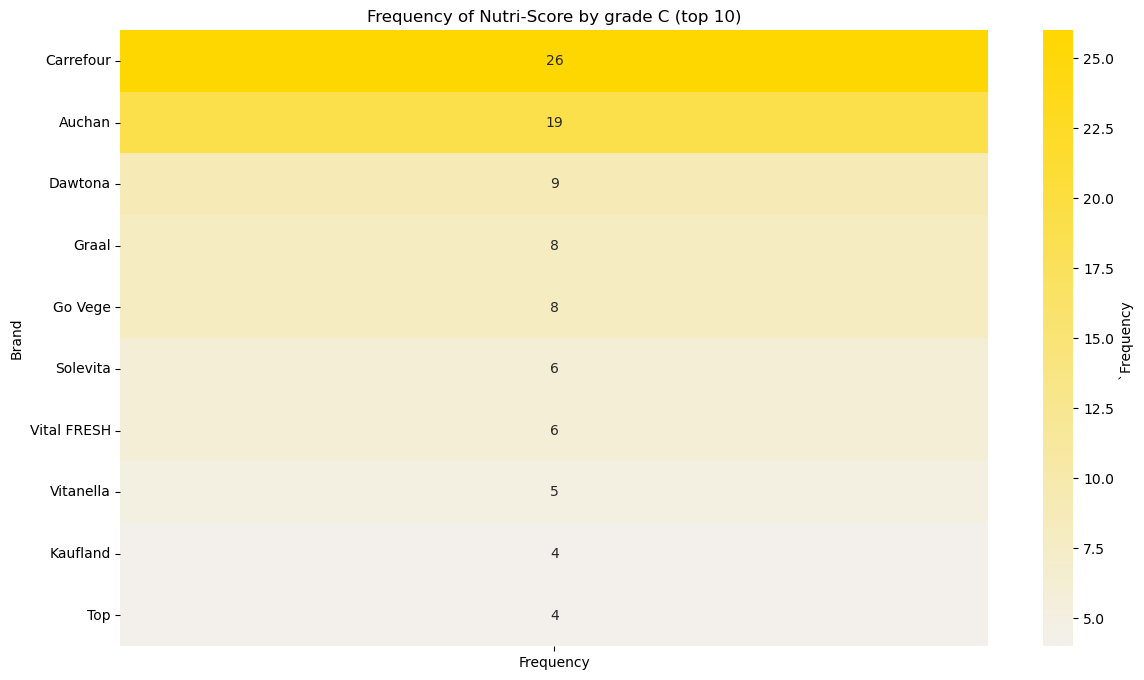

In [326]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_c_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap= sns.light_palette("gold", as_cmap=True)
, cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of Nutri-Score by grade C (top 10)')
plt.show()

In [39]:
#Nutri-Score Grade by d (top 10)
brands_with_grade_d_counts =PL_data_nutri_score[PL_data_nutri_score['nutriscore_grade'] == 'd']['brands'].value_counts()
brands_with_grade_d_counts = brands_with_grade_d_counts.reset_index()
brands_with_grade_d_counts.columns = ['Brand', 'Frequency']

In [40]:
#mapping
brands_with_grade_d_counts['Frequency'] = brands_with_grade_d_counts['Brand'].map(brands_with_grade_d_counts.set_index('Brand')['Frequency'])

In [296]:
#table
brands_with_grade_d_counts = brands_with_grade_d_counts.reset_index(drop=True)
brands_with_grade_d_counts.index = brands_with_grade_d_counts.index + 1
brands_with_grade_d_counts=brands_with_grade_d_counts.head(10)
brands_with_grade_d_counts

,Brand,Frequency
1,Carrefour,46
2,Auchan,17
3,Roleski,12
4,Tesco,12
5,Biedronka,11
6,Lisner,9
7,K-Classic,7
8,Madero,6
9,Lidl,6
10,Pilos,6


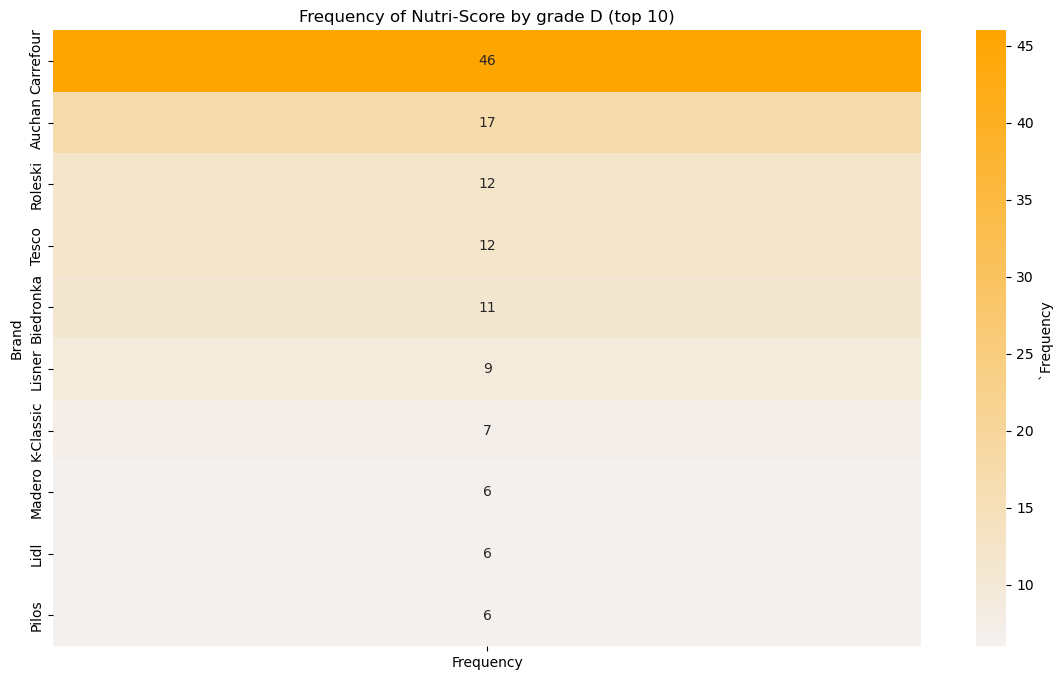

In [328]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_d_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("orange", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of Nutri-Score by grade D (top 10)')
plt.show()

In [42]:
#Nutri-Score Grade by e (top 10)
brands_with_grade_e_counts =PL_data_nutri_score[PL_data_nutri_score['nutriscore_grade'] == 'e']['brands'].value_counts()
brands_with_grade_e_counts = brands_with_grade_e_counts.reset_index()
brands_with_grade_e_counts.columns = ['Brand', 'Frequency']

In [43]:
#mapping
brands_with_grade_e_counts['Frequency'] = brands_with_grade_e_counts['Brand'].map(brands_with_grade_e_counts.set_index('Brand')['Frequency'])

In [300]:
#table
brands_with_grade_e_counts = brands_with_grade_e_counts.reset_index(drop=True)
brands_with_grade_e_counts.index = brands_with_grade_e_counts.index + 1
brands_with_grade_e_counts=brands_with_grade_e_counts.head(10)
brands_with_grade_e_counts

,Brand,Frequency
1,Carrefour,26
2,"Fritt,Ludwig Schokolade,Ludwig Czekolada",6
3,Tesco,6
4,Tymbark,6
5,Hortex,6
6,Tarczyński,5
7,Milka,5
8,Wawel,5
9,Mleczna Dolina,5
10,Biedronka,5


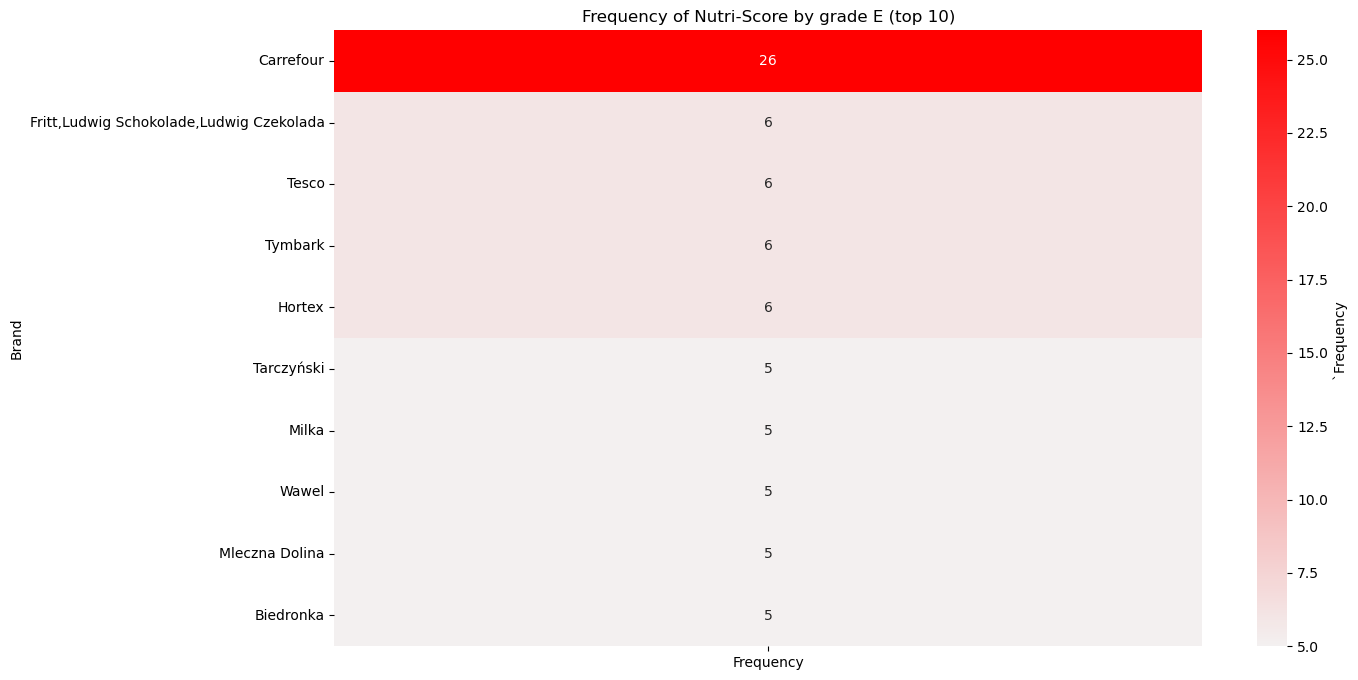

In [330]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_e_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("red", as_cmap=True)
, cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of Nutri-Score by grade E (top 10)')
plt.show()

In [45]:
#NOVA-GROUP GRADE

In [46]:
PL_data['nova_group'] # check nova group

62034      NaN
127710     3.0
139765     NaN
146824     NaN
152287     NaN
          ... 
1915960    4.0
1915963    4.0
1915965    4.0
1917343    NaN
1948919    NaN
Name: nova_group, Length: 2957, dtype: float64

In [47]:
PL_data_nova_group = PL_data.dropna(subset=['nova_group'])

In [48]:
PL_data_nova_group

,product_name,brands,brands_tags,categories,categories_tags,categories_en,labels,labels_tags,labels_en,stores,countries,countries_tags,countries_en,ingredients_analysis_tags,additives_n,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,ecoscore_score,ecoscore_grade,nutrient_levels_tags,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
127710,Chrzan tarty,Madero,madero,"Żywność i napoje na bazie roślin, Żywność na b...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",2.0,"en:e223,en:e330","E223 - Sodium metabisulphite,E330 - Citric acid",-2.0,a,3.0,NaN,unknown,"en:fat-in-moderate-quantity,en:saturated-fat-i...",113.0,474.0,5.2,0.4,13.0,9.5,3.5,1.7,0.35,0.140,68.888889,-2.0
237726,Gryzzale kabanoski z kurczaka z indykiem,Tarczyński,tarczyński,"Produkty na bazie mięsa, Mięsa, Mięsa przetwor...","en:meats-and-their-products,en:meat-preparatio...","Meats and their products,Meat preparations,Mea...",NaN,NaN,NaN,Kaufland,Polska,en:poland,Poland,"en:palm-oil-free,en:non-vegan,en:non-vegetarian",1.0,en:e401,E401 - Sodium alginate,19.0,e,4.0,14.0,f,"en:fat-in-high-quantity,en:saturated-fat-in-hi...",317.0,1318.0,21.0,6.4,5.8,1.7,NaN,24.0,2.30,0.920,6.337500,19.0
251419,Jaffa cake minis Orange,K-Classic,k-classic,"Przekąski, Słodkie przekąski, en:Biscuits and ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...",NaN,NaN,NaN,Kaufland,Polska,en:poland,Poland,"en:palm-oil,en:non-vegan,en:maybe-vegetarian",7.0,"en:e322,en:e330,en:e420,en:e440,en:e450,en:e47...","E322 - Lecithins,E330 - Citric acid,E420 - Sor...",19.0,e,4.0,45.0,c,"en:fat-in-moderate-quantity,en:saturated-fat-i...",387.0,1629.0,12.0,6.8,65.0,48.0,2.4,3.6,0.24,0.096,4.400000,19.0
256516,Dżem,"Rapsodia,Stovit Group","rapsodia,stovit-group","Żywność i napoje na bazie roślin,Żywność na ba...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",Bez dodatku cukru,en:no-added-sugar,No added sugar,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",3.0,"en:e300,en:e330,en:e440","E300 - Ascorbic acid,E330 - Citric acid,E440 -...",NaN,unknown,4.0,70.0,b,"en:fat-in-low-quantity,en:saturated-fat-in-low...",88.0,367.0,0.5,0.0,31.0,3.0,1.0,0.6,NaN,NaN,50.000000,NaN
297739,Sok grejpfrutowy,"Victoria,Cymes","victoria,cymes","Żywność i napoje na bazie roślin, Napoje, Napo...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...",Zawiera witaminę C,pl:zawiera-witaminę-c,pl:zawiera-witaminę-c,Biedronka,Polska,en:poland,Poland,"en:palm-oil-free,en:vegan,en:vegetarian",0.0,NaN,NaN,1.0,b,1.0,21.0,e,"en:fat-in-low-quantity,en:saturated-fat-in-low...",40.0,168.0,0.0,0.0,9.5,6.7,NaN,0.5,0.00,0.000,100.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915955,Napój sojowy UHT o smaku waniliowym wzbogacony...,"Vitanella,Mona Naturprodukte","vitanella,mona-naturprodukte","Żywność i napoje na bazie roślin, Napoje, Żywn...","en:plant-based-foods-and-beverages,en:beverage...","Plant-based foods and beverages,Beverages,Plan...","Wegetariańskie, Wegańskie, V-Label, V-Label Ve...","en:vegetarian,en:vegan,en:european-vegetarian-...","Vegetarian,Vegan,European Vegetarian Union,Eur...",Biedronka,Polska,en:poland,Poland,"en:may-contain-palm-oil,en:vegan,en:vegetarian",4.0,"en:e101,en:e160a,en:e407,en:e418","E101 - Riboflavin,E160a - Carotene,E407 - Carr...",0.0,b,4.0,74.0,b,"en:fat-in-moderate-quantity,en:saturated-fat-i...",59.0,249.0,1.8,0.3,7.5,7.4,NaN,3.0,0.11,0.044,0.000000,0.0
1915959,Bio Owies,Go Vege,

In [49]:
PL_data_nova_group['nova_group'].unique()

array([3., 4., 1., 2.])

In [50]:
count_1 = PL_data_nova_group['nova_group'].value_counts().get(1, 0)
count_1

378

In [51]:
count_2 = PL_data_nova_group['nova_group'].value_counts().get(2, 0)
count_2

86

In [52]:
count_3 = PL_data_nova_group['nova_group'].value_counts().get(3, 0)
count_3

561

In [53]:
count_4 = PL_data_nova_group['nova_group'].value_counts().get(4, 0)
count_4

1492

In [54]:
nova_groups = ['NOVA 1', 'NOVA 2', 'NOVA 3', 'NOVA 4']
counts = [count_1, count_2, count_3, count_4]
colors = ['#00cc44', '#3399ff', '#ff9933', '#ff3333']

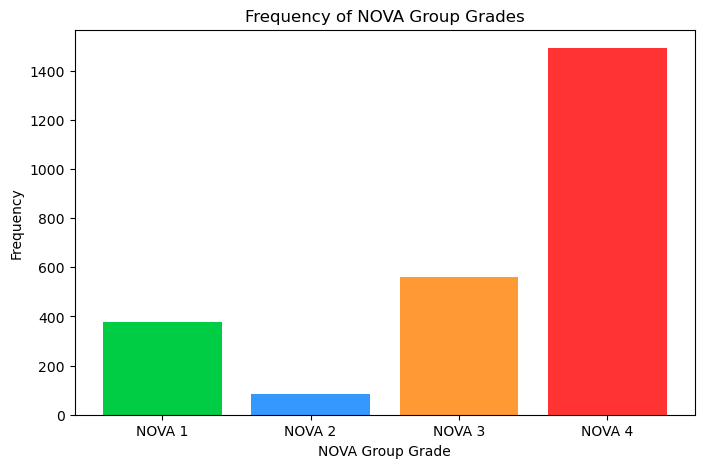

In [55]:
plt.figure(figsize=(8, 5))
plt.bar(nova_groups, counts, color=colors)
plt.xlabel('NOVA Group Grade')
plt.ylabel('Frequency')
plt.title('Frequency of NOVA Group Grades')
plt.show()

In [56]:
#NOVA-GROUP Grade by 1 (top 10)
brands_with_grade_1_counts =PL_data_nova_group[PL_data_nova_group['nova_group'] == 1]['brands'].value_counts()
brands_with_grade_1_counts = brands_with_grade_1_counts.reset_index()
brands_with_grade_1_counts.columns = ['Brand', 'Frequency']

In [57]:
#mapping
brands_with_grade_1_counts['Frequency'] = brands_with_grade_1_counts['Brand'].map(brands_with_grade_1_counts.set_index('Brand')['Frequency'])

In [304]:
#Table
brands_with_grade_1_counts = brands_with_grade_1_counts.reset_index(drop=True)
brands_with_grade_1_counts.index = brands_with_grade_1_counts.index + 1
brands_with_grade_1_counts=brands_with_grade_1_counts.head(10)
brands_with_grade_1_counts

,Brand,Frequency
1,Carrefour,52
2,Plony Natury,14
3,Vital FRESH,13
4,Vital Fresh,9
5,Auchan,9
6,Biedronka,8
7,Lidl,7
8,Mleczna Dolina,6
9,Riviva,5
10,Mroźna Kraina,5


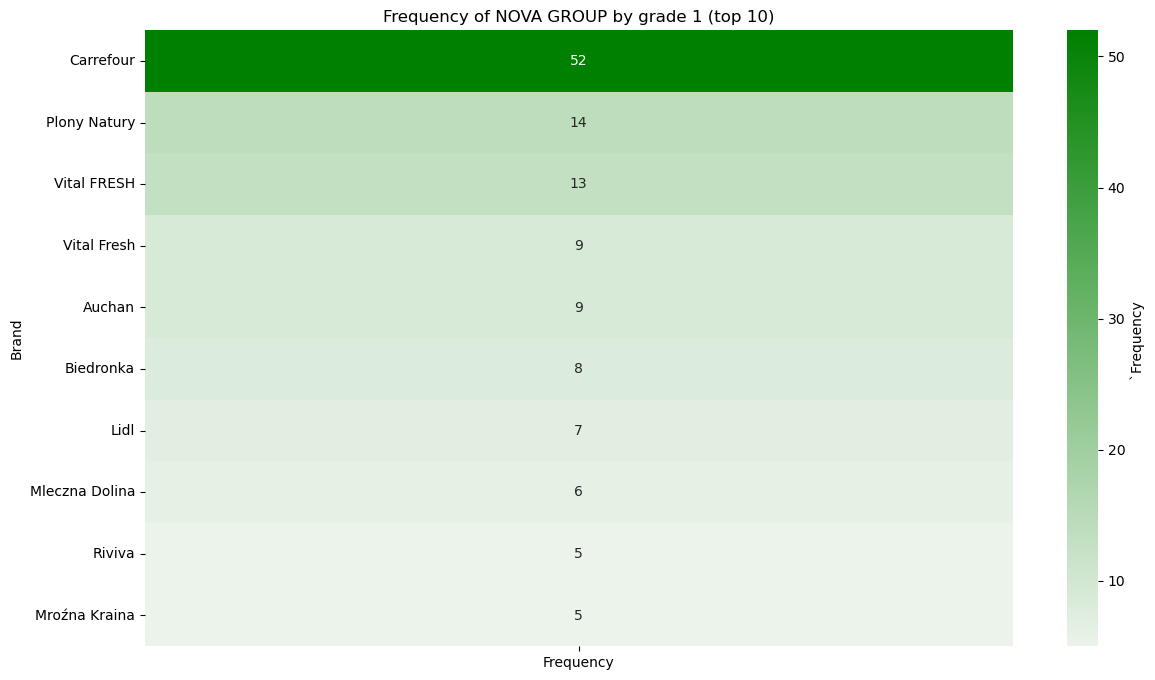

In [336]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_1_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("green", as_cmap=True)
, cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of NOVA GROUP by grade 1 (top 10)')
plt.show()

In [59]:
#NOVA-GROUP Grade by 2 (top 10)
brands_with_grade_2_counts =PL_data_nova_group[PL_data_nova_group['nova_group'] == 2]['brands'].value_counts()
brands_with_grade_2_counts = brands_with_grade_2_counts.reset_index()
brands_with_grade_2_counts.columns = ['Brand', 'Frequency']

In [60]:
#mapping
brands_with_grade_2_counts['Frequency'] = brands_with_grade_2_counts['Brand'].map(brands_with_grade_2_counts.set_index('Brand')['Frequency'])

In [308]:
#table
brands_with_grade_2_counts = brands_with_grade_2_counts.reset_index(drop=True)
brands_with_grade_2_counts.index = brands_with_grade_2_counts.index + 1
brands_with_grade_2_counts=brands_with_grade_2_counts.head(10)
brands_with_grade_2_counts

,Brand,Frequency
1,Carrefour,5
2,Lidl,4
3,Mleczna Dolina,4
4,K-Classic,3
5,Auchan,3
6,Tesco,2
7,Casa de Azeite,2
8,Wyborny,2
9,Mlekovita,2
10,"Mleczna Dolina,Polmlek",2


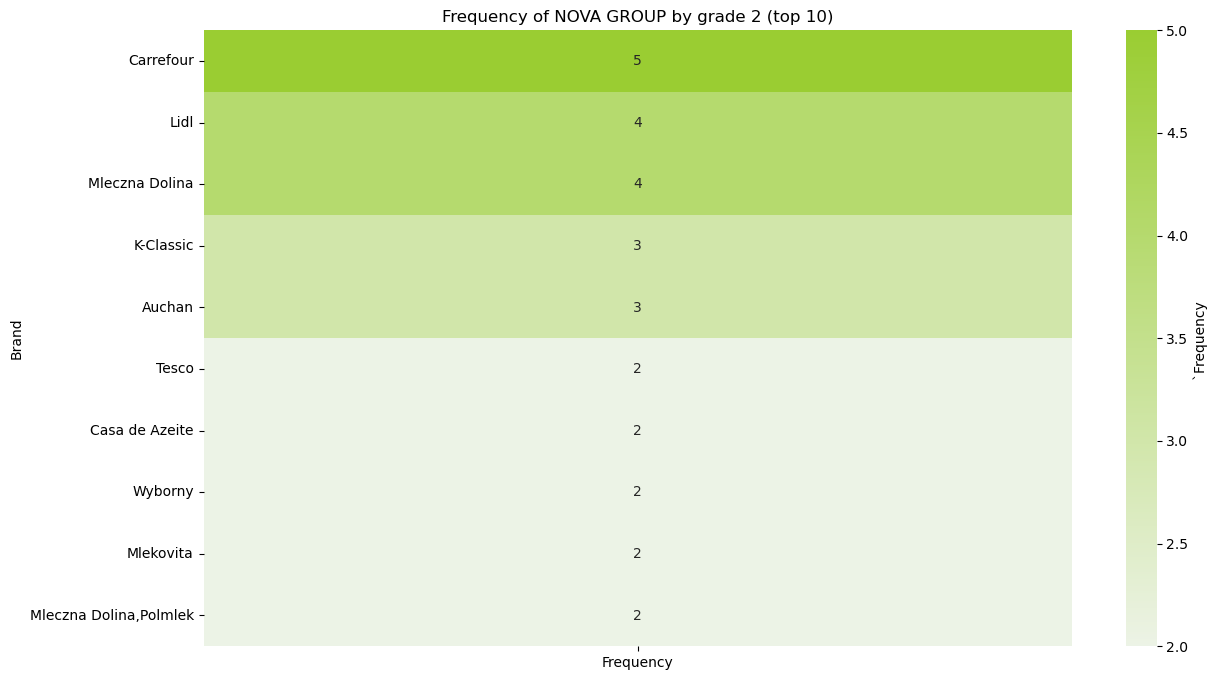

In [338]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_2_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("yellowgreen", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of NOVA GROUP by grade 2 (top 10)')
plt.show()

In [62]:
#NOVA-GROUP Grade by 3 (top 10)
brands_with_grade_3_counts =PL_data_nova_group[PL_data_nova_group['nova_group'] == 3]['brands'].value_counts()
brands_with_grade_3_counts = brands_with_grade_3_counts.reset_index()
brands_with_grade_3_counts.columns = ['Brand', 'Frequency']

In [63]:
#mapping
brands_with_grade_3_counts['Frequency'] = brands_with_grade_3_counts['Brand'].map(brands_with_grade_3_counts.set_index('Brand')['Frequency'])

In [312]:
#table
brands_with_grade_3_counts = brands_with_grade_3_counts.reset_index(drop=True)
brands_with_grade_3_counts.index = brands_with_grade_3_counts.index + 1
brands_with_grade_3_counts=brands_with_grade_3_counts.head(10)
brands_with_grade_3_counts

,Brand,Frequency
1,Carrefour,44
2,Auchan,21
3,Vemondo,10
4,K-take it veggie,9
5,Biedronka,8
6,Go Vege,8
7,Pilos,8
8,Kaufland,8
9,Graal,7
10,Tesco,6


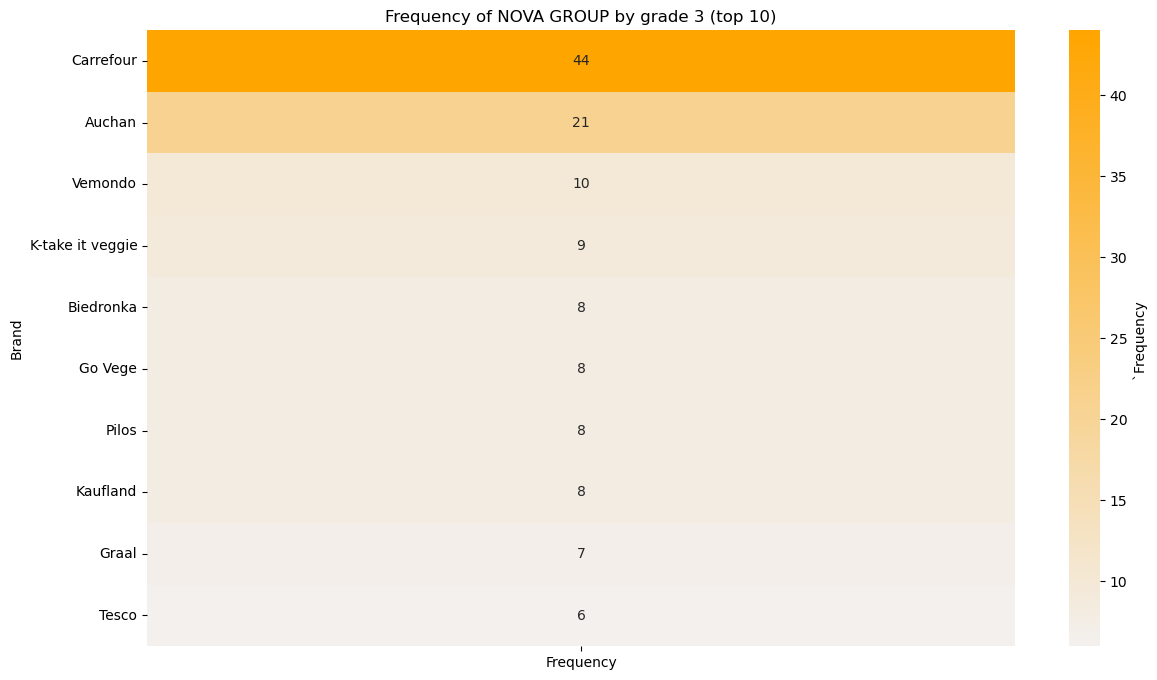

In [340]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_3_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("orange", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of NOVA GROUP by grade 3 (top 10)')
plt.show()

In [65]:
#NOVA-GROUP Grade by 4 (top 10)
brands_with_grade_4_counts =PL_data_nova_group[PL_data_nova_group['nova_group'] == 4]['brands'].value_counts()
brands_with_grade_4_counts = brands_with_grade_4_counts.reset_index()
brands_with_grade_4_counts.columns = ['Brand', 'Frequency']

In [66]:
#mapping
brands_with_grade_4_counts['Frequency'] = brands_with_grade_4_counts['Brand'].map(brands_with_grade_4_counts.set_index('Brand')['Frequency'])

In [316]:
#table
brands_with_grade_4_counts = brands_with_grade_4_counts.reset_index(drop=True)
brands_with_grade_4_counts.index = brands_with_grade_4_counts.index + 1
brands_with_grade_4_counts=brands_with_grade_4_counts.head(10)
brands_with_grade_4_counts

,Brand,Frequency
1,Carrefour,114
2,Auchan,37
3,Tesco,18
4,Biedronka,16
5,Vitanella,13
6,Roleski,12
7,Piątnica,11
8,Go Vege,11
9,Danone,10
10,Magnetic,10


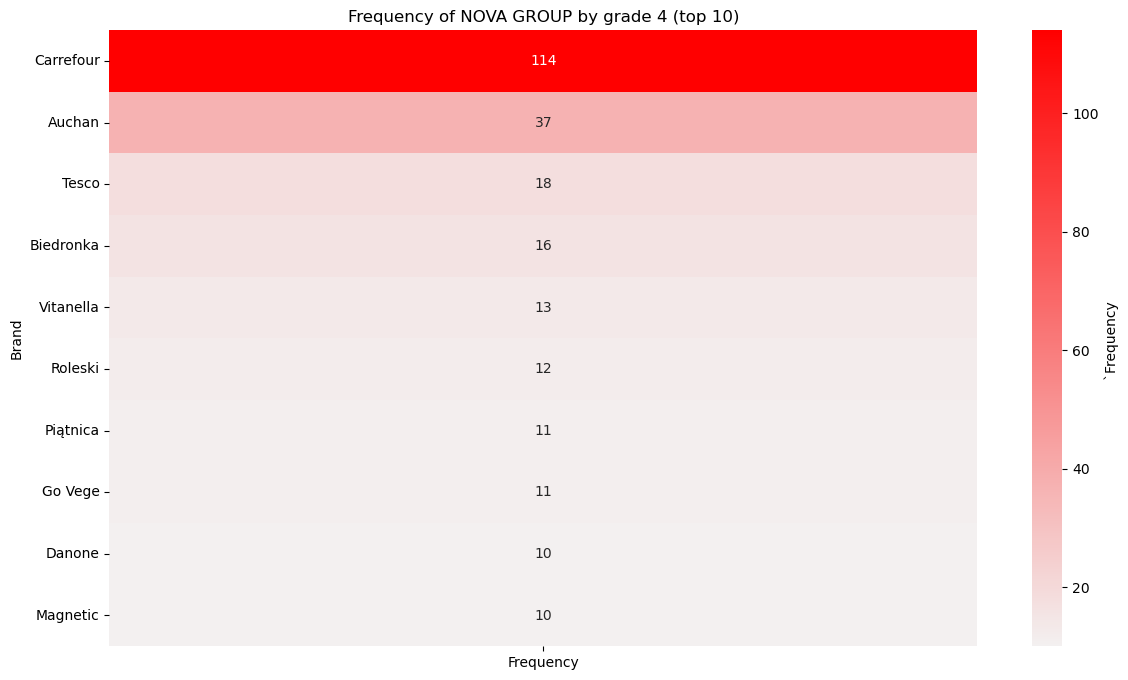

In [342]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    brands_with_grade_4_counts.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("red", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of NOVA GROUP by grade 4 (top 10)')
plt.show()

In [68]:
#PALM OIL

In [69]:
PL_data['ingredients_analysis_tags'].unique().tolist() #check for palm oil

['en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-free,en:vegan,en:vegetarian',
 nan,
 'en:palm-oil-free,en:non-vegan,en:non-vegetarian',
 'en:palm-oil,en:non-vegan,en:maybe-vegetarian',
 'en:vegan,en:vegetarian',
 'en:palm-oil-free,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-content-unknown,en:non-vegan,en:non-vegetarian',
 'en:palm-oil-free,en:non-vegan,en:vegetarian',
 'en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown',
 'en:may-contain-palm-oil,en:non-vegan,en:vegetarian-status-unknown',
 'en:may-contain-palm-oil,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-content-unknown,en:vegan,en:vegetarian',
 'en:may-contain-palm-oil,en:non-vegan,en:maybe-vegetarian',
 'en:palm-oil-free,en:non-vegan,en:maybe-vegetarian',
 'en:palm-oil,en:non-vegan,en:vegetarian-status-unknown',
 'en:palm-oil,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-content-unknown,en:non-vega

In [70]:
PL_data_contains_palm_oil = PL_data[
    PL_data['ingredients_analysis_tags'].str.contains('en:palm-oil', case=False, na=False) &
    ~PL_data['ingredients_analysis_tags'].str.contains('en:may-contain-palm-oil', case=False, na=False) &
    ~PL_data['ingredients_analysis_tags'].str.contains('en:palm-oil-free', case=False, na=False) &
    ~PL_data['ingredients_analysis_tags'].str.contains('en:palm-oil-content-unknown', case=False, na=False)
]

In [71]:
PL_data_contains_palm_oil['ingredients_analysis_tags'].unique().tolist()

['en:palm-oil,en:non-vegan,en:maybe-vegetarian',
 'en:palm-oil,en:non-vegan,en:vegetarian-status-unknown',
 'en:palm-oil,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil,en:maybe-vegan,en:maybe-vegetarian',
 'en:palm-oil,en:vegan,en:vegetarian',
 'en:palm-oil,en:non-vegan,en:vegetarian',
 'en:palm-oil,en:non-vegan,en:non-vegetarian']

In [72]:
PL_data_may_palm_oil = PL_data[PL_data['ingredients_analysis_tags'].str.contains('en:may-contain-palm-oil', na=False)]

In [73]:
PL_data_may_palm_oil['ingredients_analysis_tags'].unique().tolist()

['en:may-contain-palm-oil,en:non-vegan,en:vegetarian-status-unknown',
 'en:may-contain-palm-oil,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:may-contain-palm-oil,en:non-vegan,en:maybe-vegetarian',
 'en:may-contain-palm-oil,en:maybe-vegan,en:maybe-vegetarian',
 'en:may-contain-palm-oil,en:non-vegan,en:vegetarian',
 'en:may-contain-palm-oil,en:non-vegan,en:non-vegetarian',
 'en:may-contain-palm-oil,en:vegan,en:vegetarian',
 'en:may-contain-palm-oil,en:vegan-status-unknown,en:vegetarian']

In [74]:
PL_data_no_palm_oil = PL_data[PL_data['ingredients_analysis_tags'].str.contains('en:palm-oil-free', case=False, na=False)]

In [75]:
PL_data_no_palm_oil['ingredients_analysis_tags'].unique().tolist()

['en:palm-oil-free,en:vegan,en:vegetarian',
 'en:palm-oil-free,en:non-vegan,en:non-vegetarian',
 'en:palm-oil-free,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-free,en:non-vegan,en:vegetarian',
 'en:palm-oil-free,en:non-vegan,en:vegetarian-status-unknown',
 'en:palm-oil-free,en:non-vegan,en:maybe-vegetarian',
 'en:palm-oil-free,en:maybe-vegan,en:maybe-vegetarian',
 'en:palm-oil-free,en:maybe-vegan,en:vegetarian',
 'en:palm-oil-free,en:vegan-status-unknown,en:vegetarian']

In [76]:
PL_data_unknown_palm_oil = PL_data[PL_data['ingredients_analysis_tags'].str.contains('en:palm-oil-content-unknown', case=False, na=False)]

In [77]:
PL_data_unknown_palm_oil['ingredients_analysis_tags'].unique().tolist()

['en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian-status-unknown',
 'en:palm-oil-content-unknown,en:non-vegan,en:non-vegetarian',
 'en:palm-oil-content-unknown,en:vegan,en:vegetarian',
 'en:palm-oil-content-unknown,en:non-vegan,en:vegetarian-status-unknown',
 'en:palm-oil-content-unknown,en:vegan-status-unknown,en:vegetarian',
 'en:palm-oil-content-unknown,en:non-vegan,en:vegetarian']

In [78]:
count_contains = PL_data_contains_palm_oil['product_name'].notna().sum()
count_contains

279

In [79]:
count_may = PL_data_may_palm_oil['product_name'].notna().sum()
count_may

231

In [80]:
count_no = PL_data_no_palm_oil['product_name'].notna().sum()
count_no

1773

In [81]:
count_unknown = PL_data_unknown_palm_oil['product_name'].notna().sum()
count_unknown

363

In [82]:
data = {
    'Category': [
        'Contains Palm Oil', 
        'May Contain Palm Oil', 
        'No Palm Oil', 
        'Unknown Palm Oil Content'
    ],
    'Count': [count_contains, count_may, count_no, count_unknown]
}
df_counts = pd.DataFrame(data)

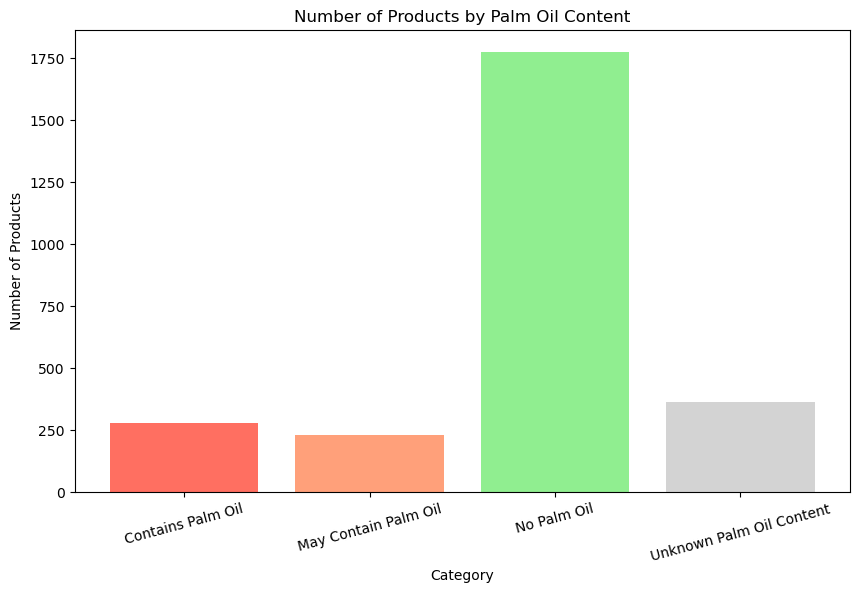

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(df_counts['Category'], df_counts['Count'], color=['#FF6F61', '#FFA07A', '#90EE90', '#D3D3D3'])
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.title('Number of Products by Palm Oil Content')
plt.xticks(rotation=15)
plt.show()

In [84]:
#contains palm oil by brands (top 10)
fequency_contains_palm_oil=PL_data_contains_palm_oil['brands'].value_counts()
fequency_contains_palm_oil = fequency_contains_palm_oil.reset_index()
fequency_contains_palm_oil.columns = ['Brand', 'Frequency']


In [85]:
#mapping
fequency_contains_palm_oil['Frequency'] = fequency_contains_palm_oil['Brand'].map(fequency_contains_palm_oil.set_index('Brand')['Frequency'])

In [280]:
#table
fequency_contains_palm_oil = fequency_contains_palm_oil.reset_index(drop=True)
fequency_contains_palm_oil.index = fequency_contains_palm_oil.index + 1
fequency_contains_palm_oil=fequency_contains_palm_oil.head(10)
fequency_contains_palm_oil

,Brand,Frequency
1,Carrefour,39
2,"Fritt,Ludwig Schokolade,Ludwig Czekolada",5
3,Magnetic,5
4,Knorr,5
5,Bakalland,5
6,"Simpl,Carrefour",4
7,Bielmar,4
8,Goplana,4
9,"Estella,Biedronka",3
10,Wawel,3


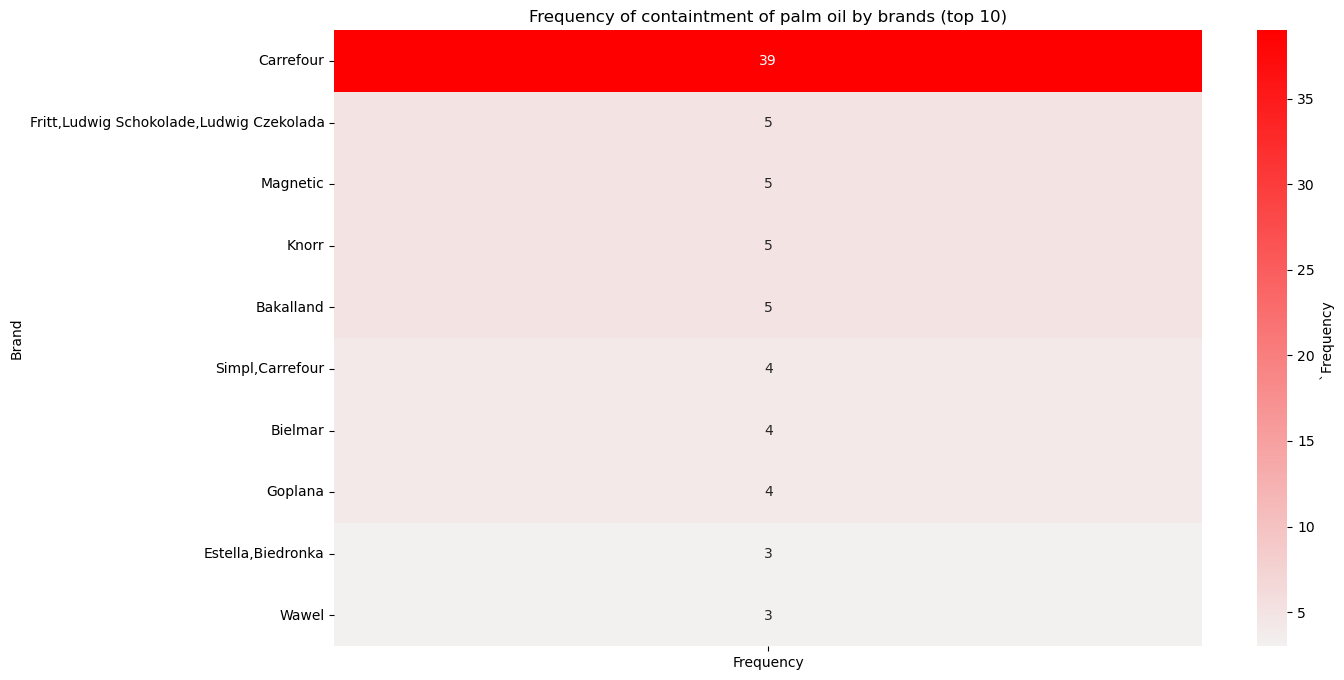

In [344]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    fequency_contains_palm_oil.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("red", as_cmap=True)
, cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of containtment of palm oil by brands (top 10)')
plt.show()

In [87]:
#may contain palm oil by brands (top 10)
fequency_may_palm_oil=PL_data_may_palm_oil['brands'].value_counts()
fequency_may_palm_oil = fequency_may_palm_oil.reset_index()
fequency_may_palm_oil.columns = ['Brand', 'Frequency']

In [88]:
#mapping
fequency_may_palm_oil['Frequency'] = fequency_may_palm_oil['Brand'].map(fequency_may_palm_oil.set_index('Brand')['Frequency'])

In [274]:
#table
fequency_may_palm_oil = fequency_may_palm_oil.reset_index(drop=True)
fequency_may_palm_oil.index = fequency_may_palm_oil.index + 1
fequency_may_palm_oil=fequency_may_palm_oil.head(10)
fequency_may_palm_oil

,Brand,Frequency
1,Carrefour,12
2,Auchan,9
3,Tesco,7
4,Biedronka,5
5,Mlekovita,4
6,Łowicz,4
7,"Delikatesowy,Mispol Food",4
8,Grycan,3
9,Kaufland,3
10,"Winiary,Nestlé",3


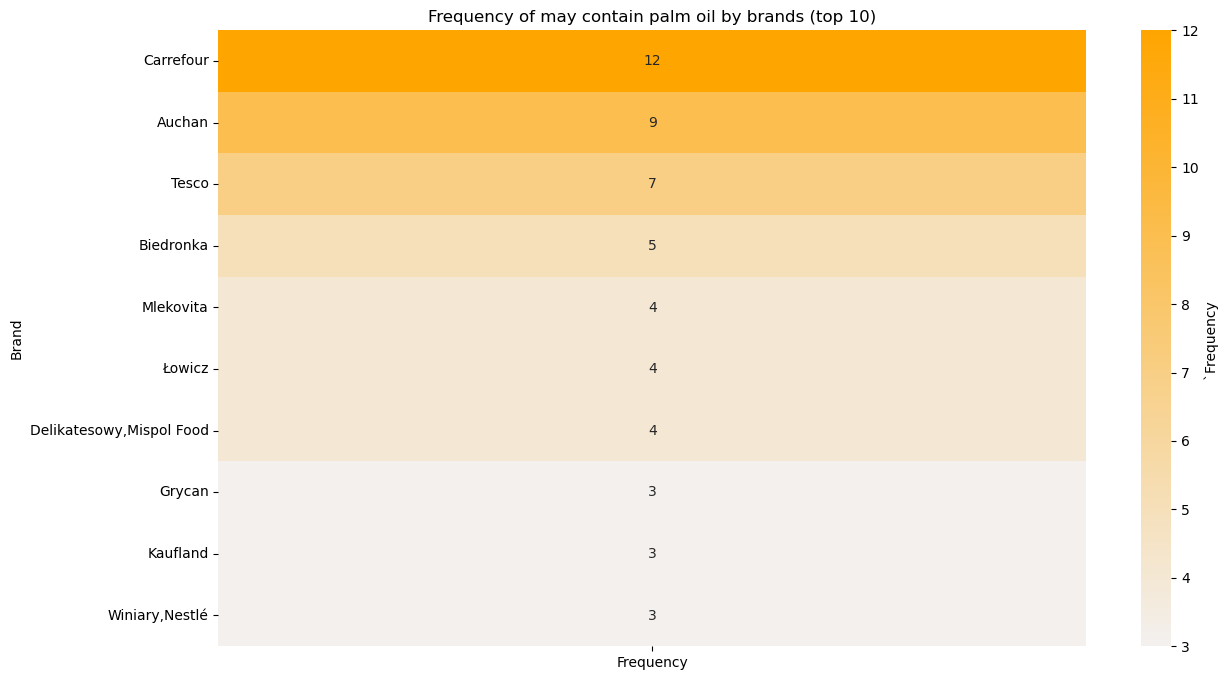

In [346]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    fequency_may_palm_oil.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("orange", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of may contain palm oil by brands (top 10)')
plt.show()

In [90]:
#not contain palm oil by brands (top 10)
fequency_no_palm_oil=PL_data_no_palm_oil['brands'].value_counts()
fequency_no_palm_oil = fequency_no_palm_oil.reset_index()
fequency_no_palm_oil.columns = ['Brand', 'Frequency']

In [91]:
#mapping
fequency_no_palm_oil['Frequency'] = fequency_no_palm_oil['Brand'].map(fequency_no_palm_oil.set_index('Brand')['Frequency'])

In [270]:
#table
fequency_no_palm_oil = fequency_no_palm_oil.reset_index(drop=True)
fequency_no_palm_oil.index = fequency_no_palm_oil.index + 1
fequency_no_palm_oil=fequency_no_palm_oil.head(10)
fequency_no_palm_oil

,Brand,Frequency
1,Carrefour,155
2,Auchan,52
3,Biedronka,26
4,Go Vege,19
5,K-take it veggie,17
6,Tesco,17
7,Vemondo,16
8,Dawtona,15
9,Vital FRESH,14
10,Lidl,14


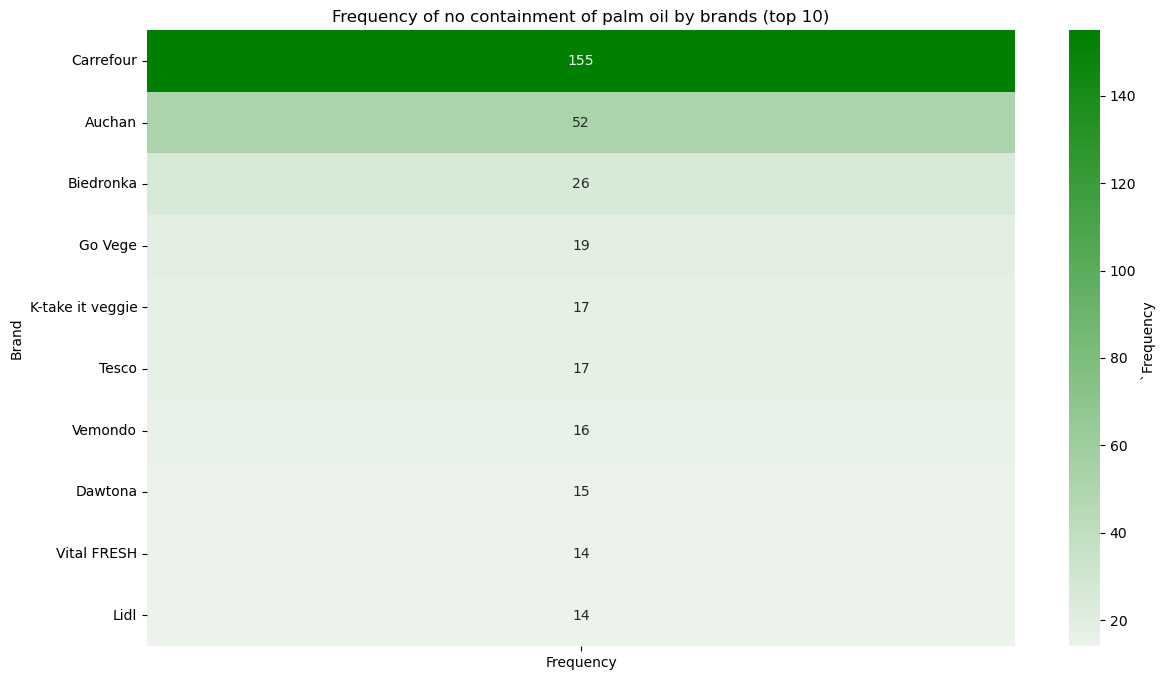

In [348]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    fequency_no_palm_oil.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("green", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of no containment of palm oil by brands (top 10)')
plt.show()

In [93]:
#unknown palm oil by brands (top 10)
fequency_unknown_palm_oil=PL_data_unknown_palm_oil['brands'].value_counts()
fequency_unknown_palm_oil = fequency_unknown_palm_oil.reset_index()
fequency_unknown_palm_oil.columns = ['Brand', 'Frequency']

In [94]:
#mapping
fequency_unknown_palm_oil['Frequency'] = fequency_unknown_palm_oil['Brand'].map(fequency_unknown_palm_oil.set_index('Brand')['Frequency'])

In [260]:
#table
fequency_unknown_palm_oil = fequency_unknown_palm_oil.reset_index(drop=True)
fequency_unknown_palm_oil.index = fequency_unknown_palm_oil.index + 1
fequency_unknown_palm_oil=fequency_unknown_palm_oil.head(10)
fequency_unknown_palm_oil

,Brand,Frequency
1,Carrefour,22
2,Auchan,10
3,Tesco,7
4,Plony Natury,6
5,Lidl,5
6,Piątnica,5
7,Vitanella,5
8,Cenos,4
9,Bakalland,4
10,Culineo,3


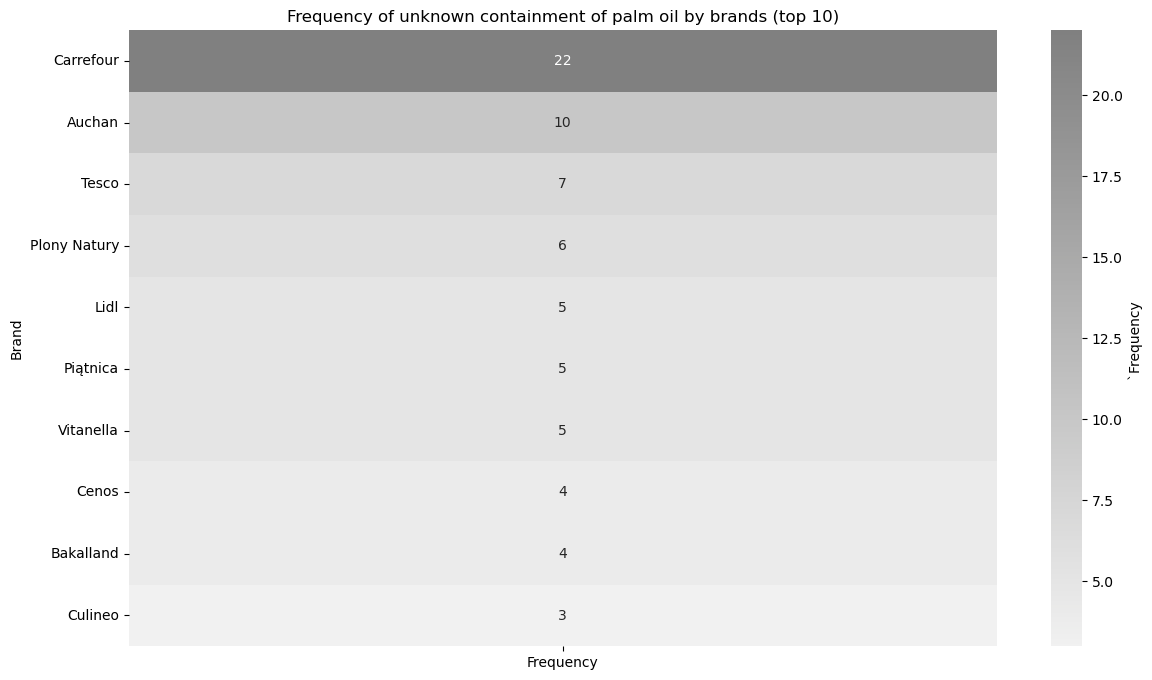

In [350]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    fequency_unknown_palm_oil.set_index('Brand'),  
    annot=True,fmt=".0f", cmap=sns.light_palette("grey", as_cmap=True), cbar_kws={'label': '`Frequency '}
)
plt.title('Frequency of unknown containment of palm oil by brands (top 10)')
plt.show()

Additives

In [97]:
PL_data['additives_tags'].unique().tolist() #check for additives 

[nan,
 'en:e223,en:e330',
 'en:e401',
 'en:e322,en:e330,en:e420,en:e440,en:e450,en:e471,en:e500',
 'en:e300,en:e330,en:e440',
 'en:e290,en:e338',
 'en:e160b,en:e300,en:e316,en:e503,en:e508,en:e509',
 'en:e14xx,en:e202,en:e211,en:e262,en:e270,en:e325,en:e412,en:e415',
 'en:e330',
 'en:e339,en:e407',
 'en:e150,en:e160a,en:e339,en:e407',
 'en:e101,en:e101i,en:e322',
 'en:e471',
 'en:e101,en:e339,en:e418,en:e585,en:e955',
 'en:e330,en:e414,en:e445,en:e950,en:e951',
 'en:e101,en:e150d,en:e290,en:e330,en:e331',
 'en:e330,en:e440',
 'en:e322,en:e412,en:e471',
 'en:e14xx',
 'en:e322,en:e322i',
 'en:e322,en:e412,en:e471,en:e476',
 'en:e160a,en:e202,en:e322,en:e330,en:e406,en:e471,en:e476',
 'en:e330,en:e385',
 'en:e322',
 'en:e160c,en:e202,en:e260,en:e270,en:e330,en:e415',
 'en:e14xx,en:e322,en:e407',
 'en:e1103,en:e322,en:e330,en:e420,en:e440,en:e503,en:e503i',
 'en:e535',
 'en:e160a,en:e160ai,en:e300,en:e330',
 'en:e322,en:e322i,en:e420',
 'en:e536',
 'en:e300,en:e330',
 'en:e250,en:e330',
 '

In [98]:
len(PL_data['additives_tags'].unique())

732

In [99]:
PL_data['additives_n'].sum()

4362.0

In [100]:
len(PL_data['additives_n'])

2957

In [101]:
unique_additives = set(tag for tags in PL_data['additives_tags'].dropna() for tag in tags.split(','))

In [102]:
unique_additives_list = list(unique_additives)

In [103]:
unique_additives_list

['en:e333',
 'en:e502',
 'en:e535',
 'en:e336',
 'en:e965ii',
 'en:e120',
 'en:e211',
 'en:e210',
 'en:e300',
 'en:e425i',
 'en:e304',
 'en:e319',
 'en:e585',
 'en:e442',
 'en:e282',
 'en:e392',
 'en:e460',
 'en:e551',
 'en:e428',
 'en:e332',
 'en:e407',
 'en:e330',
 'en:e250',
 'en:e558',
 'en:e500i',
 'en:e477',
 'en:e350',
 'en:e421',
 'en:e261',
 'en:e171',
 'en:e172',
 'en:e337',
 'en:e102',
 'en:e450i',
 'en:e150a',
 'en:e170i',
 'en:e504',
 'en:e440a',
 'en:e536',
 'en:e475',
 'en:e1422',
 'en:e472a',
 'en:e641',
 'en:e315',
 'en:e223',
 'en:e322i',
 'en:e452',
 'en:e1521',
 'en:e104',
 'en:e509',
 'en:e481',
 'en:e553',
 'en:e100',
 'en:e332ii',
 'en:e160c',
 'en:e262',
 'en:e1510',
 'en:e967',
 'en:e417',
 'en:e301',
 'en:e508',
 'en:e503',
 'en:e451',
 'en:e1414',
 'en:e327',
 'en:e500',
 'en:e406',
 'en:e451i',
 'en:e150b',
 'en:e466',
 'en:e331iii',
 'en:e631',
 'en:e338',
 'en:e418',
 'en:e401',
 'en:e503i',
 'en:e200',
 'en:e960',
 'en:e575',
 'en:e101',
 'en:e503ii',
 'e

In [104]:
additives_count = Counter(tag for tags in PL_data['additives_tags'].dropna() for tag in tags.split(','))


In [105]:
additives_count_df = pd.DataFrame(additives_count.items(), columns=['Additive', 'Count']).sort_values(by='Count', ascending=False)

In [106]:
additives_count_df

,Additive,Count
1,en:e330,503
3,en:e322,316
8,en:e500,199
7,en:e471,160
17,en:e14xx,144
...,...,...
126,en:e421,1
79,en:e350i,1
158,en:e501i,1
159,en:e525,1


In [107]:
additives_count_df = additives_count_df[additives_count_df['Count'] >= 50]

In [108]:
additives_count_df = additives_count_df.reset_index(drop=True)
additives_count_df.index = additives_count_df.index + 1

In [252]:
#table
top_additives = additives_count_df.head(10) # top 10 additives
top_additives

,Additive,Count
1,en:e330,503
2,en:e322,316
3,en:e500,199
4,en:e471,160
5,en:e14xx,144
6,en:e300,132
7,en:e250,126
8,en:e503,123
9,en:e412,117
10,en:e160a,113


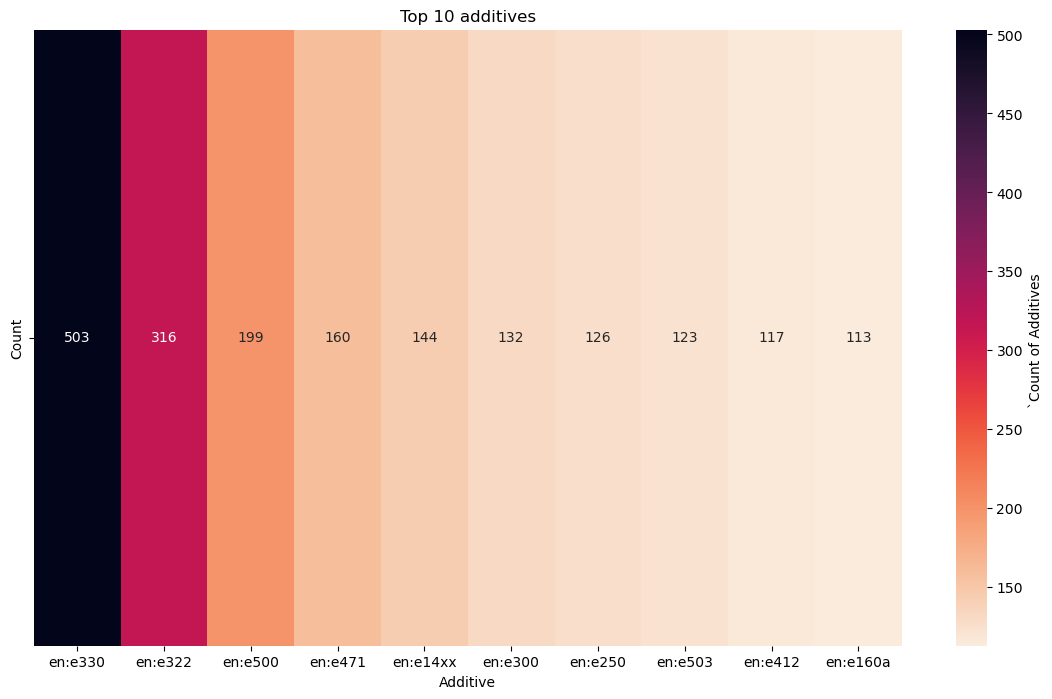

In [278]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    top_additives.set_index('Additive').T,  
    annot=True,fmt=".0f", cmap="rocket_r", cbar_kws={'label': '`Count of Additives '}
)
plt.title('Top 10 additives')
plt.show()

In [110]:
#by sum
brand_additives_sum = PL_data.groupby('brands')['additives_n'].sum().reset_index()

In [111]:
top_brands_additives_by_sum = brand_additives_sum.sort_values(by='additives_n', ascending=False).head(10)

In [112]:
top_brands_additives_by_sum = top_brands_additives_by_sum.reset_index(drop=True)
top_brands_additives_by_sum.index = top_brands_additives_by_sum.index + 1
top_brands_additives_by_sum

,brands,additives_n
1,Carrefour,313.0
2,Auchan,105.0
3,Biedronka,60.0
4,Tesco,56.0
5,Lisner,48.0
6,Dr Gerard,44.0
7,"Simpl,Carrefour",39.0
8,Kraina Wędlin,31.0
9,Magnetic,28.0
10,Nongshim,28.0


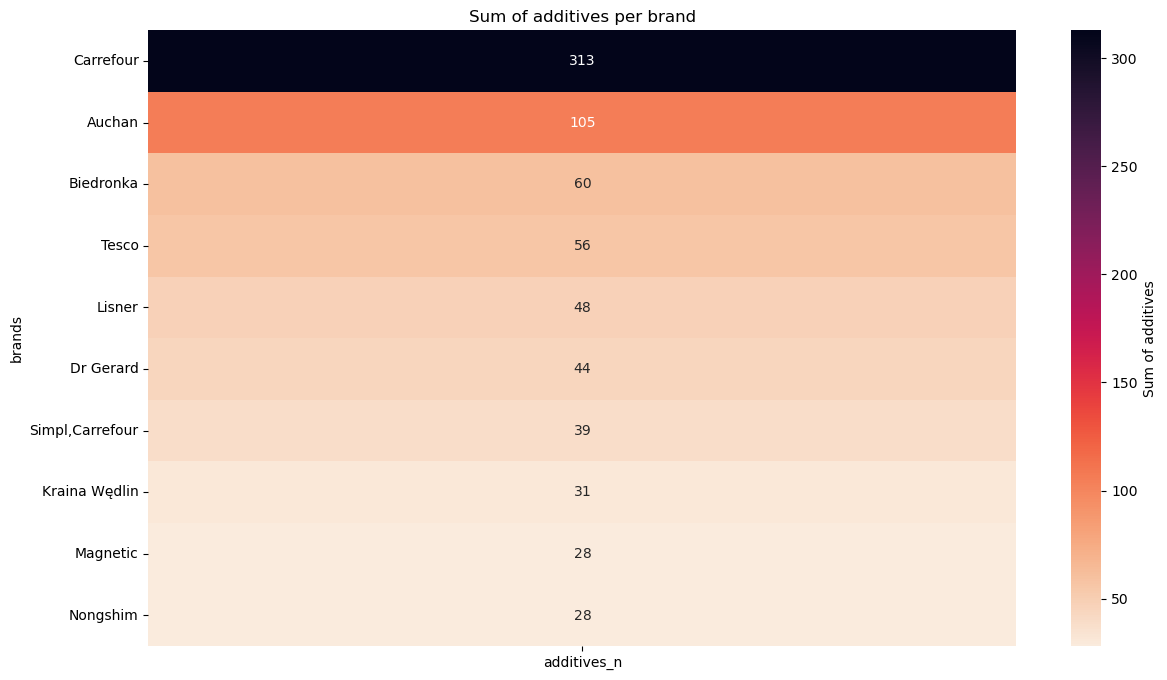

In [113]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    top_brands_additives_by_sum.set_index('brands'),  
    annot=True,fmt=".0f", cmap="rocket_r", cbar_kws={'label': 'Sum of additives'}
)
plt.title('Sum of additives per brand')
plt.show()

In [114]:
#by average
brand_additives_avg = PL_data.groupby('brands')['additives_n'].mean().reset_index()

In [115]:
top_brands_additives_by_avg = brand_additives_avg.sort_values(by='additives_n', ascending=False).head(10)

In [116]:
top_brands_additives_by_avg = top_brands_additives_by_avg.reset_index(drop=True)
top_brands_additives_by_avg.index = top_brands_additives_by_avg.index + 1
top_brands_additives_by_avg

,brands,additives_n
1,"Bonitki,Tago",14.0
2,"Tic Tac,Tic Tac Gum,Ferrero,UAB Eugesta",10.0
3,Schweppes,10.0
4,"Mentos,Perfetti Van Melle",10.0
5,"Feliciana,Dr. Oetker",10.0
6,"Słodka cukiernia,Delicpol",10.0
7,"Idk,sushi 4 you",10.0
8,Indomie,10.0
9,Dzik,10.0
10,"Sokołów,Nasze Smaki,Biedronka",10.0


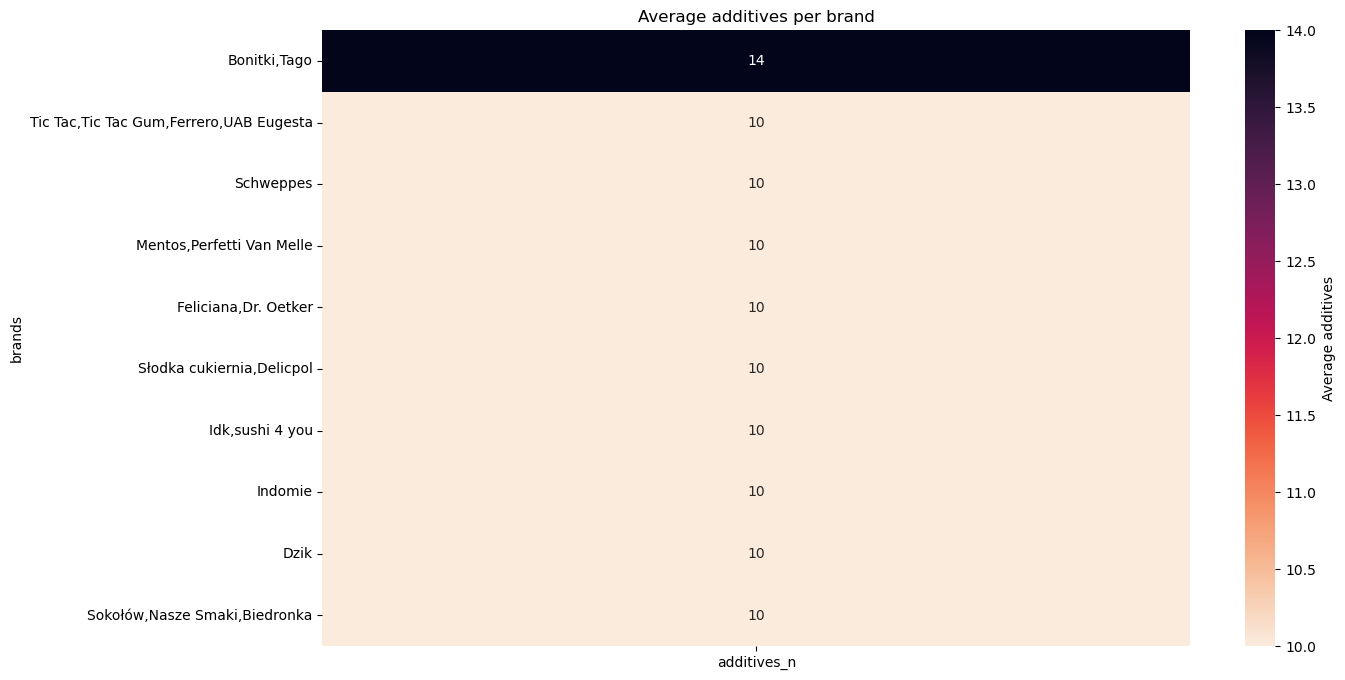

In [117]:
#heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    top_brands_additives_by_avg.set_index('brands'),  
    annot=True,fmt=".0f", cmap="rocket_r", cbar_kws={'label': 'Average additives'}
)
plt.title('Average additives per brand')
plt.show()